In [1]:
import os
from glob import glob
from pprint import pprint

cwd = os.getcwd()
print(cwd)

py_files = glob('*.py')
print(py_files)

/Users/qray/OneDrive - University of Minnesota/MGIS/2020 Summer Semester/temp/EveryField
['fields_functions.py', 'global_config.py']


In [2]:
### Config parameters are stroed in the global_config.py, imported at the top of the fields_functions.py
### Import fields functions
from fields_functions import *

In [3]:
### take a look at the config parameters

pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 'auto',
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefi

In [4]:
### You can update the config dictionary interactively, too
config['prep_base_chunk'] = 500
pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 500,
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefix':

### Loading data

The prep_data() function expects the 'prep_data_dir' parameter in the config dictionary to have zipped Sentinel-2 L2A tiles. L2A tiles have been preprocessed to estimate bottom of atmosphere pixel values, correcting for atmospheric aerosols. The metadata for L1C data is apparently structured differently and does not work with the GDAL function to read the tile info. 

If you do not have access to the full set of Sentinel-2 tiles, you can skip the prep_data() function call and load a sample of the data found in the google drive project folder here: https://drive.google.com/drive/folders/1n2tzO8I6EZQdkYzcB8L9omVsQDsb8eEh?usp=sharing

The sample data comes in four versions for an area in NW Minnesota from the T14TPT tile during the 2019 groing season: 500x500 pixels with and without cloud mask applied, and 1000x1000 pixel with and without cloud mask applied. 

To load the sample data, download the version of interest and fill in the sample_data_fp variable to point to where it is saved locally. Skip the next cell and run the cell to load the netCDF file directly into xarray. This should enable you to run the rest of the demo code.

In [5]:
### Loaing data from a directory of zipped Sentinel-2 files

ds_time_stack = prep_data()

Cloud Coverage Threshold: 50
FAILED cloud coverage: 2019 05 03 with  99.009547 pct | nodata pixel pct: 0.126635
FAILED cloud coverage: 2019 05 06 with  72.591515 pct | nodata pixel pct: 5.957223
passed cloud coverage: 2019 05 13 with 34.97001 pct | nodata pixel pct: 0.134791
FAILED cloud coverage: 2019 05 16 with  72.077132 pct | nodata pixel pct: 5.796779
FAILED cloud coverage: 2019 05 23 with  96.121381 pct | nodata pixel pct: 0.149615
FAILED cloud coverage: 2019 05 26 with  73.563154 pct | nodata pixel pct: 5.719112
passed cloud coverage: 2019 06 02 with 21.420233 pct | nodata pixel pct: 0.193563
passed cloud coverage: 2019 06 05 with 3.328879 pct | nodata pixel pct: 5.51809
passed cloud coverage: 2019 06 12 with 3.1731840000000004 pct | nodata pixel pct: 0.164777
FAILED cloud coverage: 2019 06 15 with  91.997779 pct | nodata pixel pct: 5.732784
FAILED cloud coverage: 2019 06 22 with  95.609655 pct | nodata pixel pct: 0.121118
passed cloud coverage: 2019 06 25 with 31.59953999999999

### Loading sample data

In [7]:
### Loading sample data directly from netCDF file

# filepath to the sample data
sample_data_fp = 'sample_data_TPT_px500_cldcov40_cldmask.nc'

### In order to utilize parallel processing with dask within xarray, make sure to set a chunk size when reading in the data.
### You can use the keywork 'auto' to have dask automatically set a chunk size based on data size and memory limitations
ds_time_stack = xr.open_dataset(sample_data_fp, chunks={'x':'auto', 'y':'auto','time':'auto'})
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 30, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:32614
    res:           [10. 10.]
    is_tiled:      1
    nodatavals:    [nan nan nan nan]
    scales:        [1. 1. 1. 1.]
    offsets:       [0. 0. 0. 0.]
    descriptions:  ['B4, central wavelength 665 n

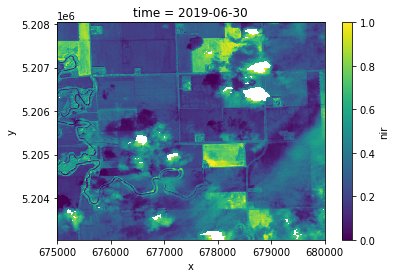

In [8]:
ds_time_stack.isel(time=8).nir.plot()

In [9]:
%%time

### preprocessing main function to combine data read and preprocessing.
### not used here, but it is useful for batch processing multiple tiles
def preprocess_main():
    global config
    ### START TIMING
    t_start = time.perf_counter()
    t_proc_start = time.process_time()
    
    ### Prep data stack
    ds_time_stack = prep_data()
    ds_time_stack = ds_time_stack.sel(time=slice('2019-05-01', '2019-11-01'))
    
    ### Preprocess data and save to netCDF file
    preprocess_to_netcdf(ds_time_stack)
    
    ### STOP TIMING
    t_stop = time.perf_counter()
    t_proc_stop = time.process_time()
    tot_cpu_time = t_proc_stop - t_proc_start
    tot_wall_time = t_stop - t_start
    ### timing
    print("Total CPU time:", tot_cpu_time)
    print("Total Wall time:", tot_wall_time)
    
    ### Write out processing log to record processing time and input parameters in the same folder as the shp output
    preprocessing_log(tot_cpu_time, tot_wall_time)
    
preprocess_to_netcdf(ds_time_stack)

/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Monthly Median Total CPU time: 1.8350369999999998
Monthly Median Total Wall time: 2.307261708999995
saving preprocessed tile to: preproc_out_dir/fields_preproc_demo_TPT.nc


/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Writing NetCDF file Total CPU time: 2.45533
Writing NetCDF file Total Wall time: 2.9018961650000037
ndvi_mon_med_stack <xarray.DataArray (stack: 250000, variable: 6)>
dask.array<where, shape=(250000, 6), dtype=float64, chunksize=(250000, 6), chunktype=numpy.ndarray>
Coordinates:
  * variable  (variable) datetime64[ns] 2019-05-01 2019-06-01 ... 2019-10-01
  * stack     (stack) MultiIndex
  - x         (stack) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  - y         (stack) float64 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
image array to cluster: <xarray.DataArray (stack: 250000, variable: 8)>
dask.array<rechunk-merge, shape=(250000, 8), dtype=float64, chunksize=(250000, 8), chunktype=numpy.ndarray>
Coordinates:
  * stack     (stack) MultiIndex
  - x         (stack) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  - y         (stack) float64 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * variable  (variable) object 2019-05-01 2019-06-01 ... 'ndvi_std' 'ndwi_mean'
k

/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


kmeans clustering done in 4.435s.
Writing Cluster Centers NetCDF file Total CPU time: 0.012893999999999295
Writing Cluster Centers NetCDF file Total Wall time: 0.006090901000000315
CPU times: user 7.96 s, sys: 1.88 s, total: 9.85 s
Wall time: 10.6 s


In [10]:
%%time

### This is for combining the preprocessed data and k-means cluster centers from the sampled chunks into a statewide mask

### This results in an unexpected NameError on the tile_id name but the outputs are as expected and I couldn't find the bug

write_statewide_kmeans_model()

t_start = time.time()
create_mask_from_kmeans()
print(tile_id, "mask processing done in %0.3fs." % (time.time() - t_start))

<xarray.Dataset>
Dimensions:       (cluster_vars: 8, n: 15)
Coordinates:
  * cluster_vars  (cluster_vars) object 'ndvi_may' 'ndvi_jun' ... 'ndwi_mean'
Dimensions without coordinates: n
Data variables:
    clusters      (n, cluster_vars) float64 dask.array<chunksize=(15, 8), meta=np.ndarray>
KMeans training on statewide samples done in 0.122s.
Cluster Centers: <xarray.DataArray (cluster_ID: 15, cluster_vars: 8)>
array([[ 8.39366659e-02,  6.26798948e-01,  5.88953619e-01,
         3.76429554e-01,  4.45687429e-01,  5.16117693e-01,
         4.40461435e-01,  2.63119235e-01],
       [-4.60079108e-01, -3.88640314e-01,  7.91780530e-01,
         8.12927704e-01,  6.42161552e-01, -2.62540307e-01,
         7.77929728e-01,  1.51829517e-01],
       [-2.22519754e-01, -2.26789308e-02,  4.68592007e-02,
         4.10142771e-02,  9.99302229e-02, -4.76475136e-02,
         2.51531448e-01,  3.74323043e-01],
       [-4.25179687e-01,  3.71334627e-01,  6.09998479e-01,
        -1.37757093e-01, -3.40044999e-01, -

/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


NameError: name 'tile_id' is not defined

there are 1 patches for tile: TPT
<xarray.Dataset>
Dimensions:  (x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
Data variables:
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>


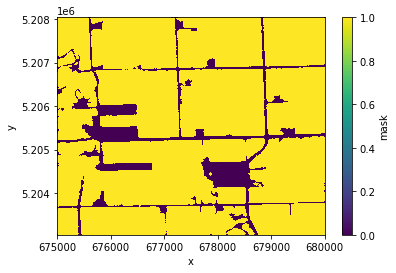

In [11]:
### Load mask to take a look at it

mask_array = load_mask()
mask_array.mask.plot()

In [12]:
%%time

### Demo function for combining 
def segmentation_from_clusters_main():
    mask_array = load_mask()
    
    ds_time_stack = prep_data()
    
    t0 = time.time()
    ### Segment the image
    segmented_array, rgb_image_nir = segment_data(ds_time_stack, mask_array)
    print("Segmentation done in %0.3fs." % (time.time() - t0))
    
    t0 = time.time()
    ### Write segments to shapefile
    write_shapefile(segmented_array, ds_time_stack, mask_array.mask)
    print("Shapefile write done in %0.3fs." % (time.time() - t0))
    
# t0 = time.time()    
# segmentation_from_clusters_main()
# print("Processing done in %0.3fs." % (time.time() - t0))
    
    
t0 = time.time()
### Segment the image
segmented_array, rgb_image_nir = segment_data(ds_time_stack, mask_array)
print("Segmentation done in %0.3fs." % (time.time() - t0))

t0 = time.time()
### Write segments to shapefile
write_shapefile(segmented_array, ds_time_stack, mask_array.mask)
print("Shapefile write done in %0.3fs." % (time.time() - t0))

-------Segmentation-------


KeyboardInterrupt: 

### Thresholding Approach

In [17]:
%%time

## Example code for running Thresholding approach
## These functions are not integrated into the global config, so variables have to be defined before the function call

### Set file paths for read and write
file_out_str = '_code_demo_threshold'
out_dir = config['shp_out_dir']
tile_id = config['prep_tile_id']
raster_dir = config['prep_file_dir']
x_start = config['prep_x_start']
y_start = config['prep_y_start']
step = config['prep_step']
base_chunk = 'auto'

## Data read parameters
cloud_thresh = 20

## Crop maask parameters
ndwi_thresh = 0.5 
ndvi_max_thresh = 0.5
ndvi_range_thresh = 0.5 
edges_thresh = 0.3

# set rgb date string from the dict
rgb_date_str = rgb_date_dict[tile_id]
rgb_gaussian_sigma = config['seg_rgb_gaussian_sigma']
fz_scale = config['seg_fz_scale']
fz_sigma = config['seg_fz_sigma']
fz_min_size = config['seg_fz_min_size']

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 16.9 µs


### Loading data for thresholding approach

If you are reading data directly from the zipped sentinel tiles, you can run this cell below to load the data. If you are using the sample data, run the cell above labeled "Loading sample data" and skip the cell below.

In [14]:
# Load time stack - this function operates slightly differently than the one used above
# This one is outdated and the above should be used going forward
ds_time_stack = prep_ds_time_stack(raster_dir, 
                           tile_id, 
                           cloud_coverage_thresh = cloud_thresh,
                           cloud_mask = False,
                           base_chunk = "auto", 
                           overlap_bool = False, 
                           manual_subset = True, x_start = x_start, y_start = y_start, step = step)
    
### Select only May to September data, don't want to use March/April for Twin Cities metro tiles
ds_time_stack = ds_time_stack.sel(time=slice('2019-05-01', '2019-10-01'))

print("tile loaded:", tile_id)


### This function runs the full thresholding approach as a single function.
### It is broken out by step in the cells below to demonstrate and visualize what each step accomplishes.
# process_all_no_data_read(input_ds = ds_time_stack, tile_id = tile_id, 
#                          out_dir = out_dir, file_out_str = file_out_str, cloud_coverage_thresh = cloud_thresh, 
#                          subset = True, x_start = x_start, y_start = y_start, step = step, base_chunk="auto", 
#                          ndwi_thresh = ndwi_thresh, ndvi_max_thresh = ndvi_max_thresh, ndvi_range_thresh = ndvi_range_thresh, 
#                          edges_thresh = edges_thresh,
#                          rgb_date_str = rgb_date_str, rgb_gaussian_sigma = rgb_gaussian_sigma, 
#                          fz_scale = fz_scale, fz_sigma = fz_sigma, fz_min_size = fz_min_size)

NameError: name 'raster_dir' is not defined

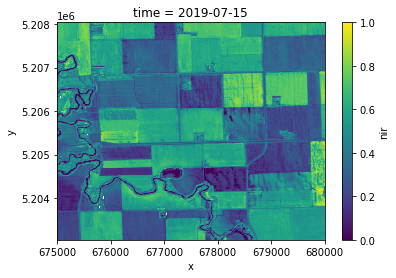

In [15]:
ds_time_stack.isel(time=12).nir.plot()

### Breaking down the thresholding approach by step

In the cells below, each step of the thresholding approach is broken out. First we create a crop mask by passing a series of threshold values to the NDVI mean monthly max, NDVI mean monthly change from May to peak, mean edge magnitude, and NDWI. Then, we prepare a cloud free RGB image to use for segmentation and apply the mask to it. Then we pass the masked RGB image to the segmentation step to create the field polygons. Finally, we write the field polygons to a shapefile.

For each step, the output is added to the ds_time_stack data structure as a new data variable. This keeps all the data organized and with consistent spatial metadata throughout the process. Printing the ds_time_stack dataset after each step reveals the intermediate outputs: mask, rgb, fz_segments (segmented field polygons).

In [18]:
%%time

### Create crop mask
ds_time_stack = mask_processing(ds_time_stack, 
                                ndwi_thresh = ndwi_thresh, 
                                ndvi_max_thresh = ndvi_max_thresh, 
                                ndvi_range_thresh = ndvi_range_thresh, 
                                edges_thresh = edges_thresh)

print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 30, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:32614
    res:           [10. 10.]
    is_tiled:      1
    nodatavals:    [nan nan nan nan]
    scales:        [1. 1. 1. 1.]
    off

/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 16.5 s, sys: 11.5 s, total: 28 s
Wall time: 19.8 s


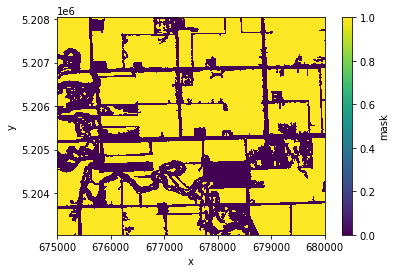

In [19]:
%%time

### plot crop mask
ds_time_stack.mask.plot()

In [20]:
%%time

ds_time_stack['rgb'] = rgb_image(rgb_date_str = rgb_date_str, 
                                          ds_time_stack = ds_time_stack, 
                                          rgb_chunk_size = {'band': "auto", 'x': base_chunk, 'y': base_chunk}, 
                                          gaussian_filt = True, 
                                          gaussian_sigma = rgb_gaussian_sigma, 
                                          percentile = 1)
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (band: 3, time: 30, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
  * band     (band) <U1 'r' 'g' 'b'
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
    rgb      (y, x, band) float64 dask.array<chunksize=(500, 500, 3), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:3

/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 15.9 s, sys: 9 s, total: 24.9 s
Wall time: 14.9 s


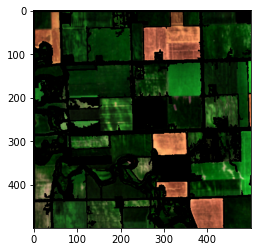

In [21]:
%%time

### plot masked RGB image
plt.imshow(exposure.equalize_adapthist(ds_time_stack.rgb))

In [22]:
%%time 
### Segment the RGB image
fz_segments = ds_time_stack.rgb.data.map_blocks(segment_fz, scale = fz_scale, sigma = fz_sigma, min_size = fz_min_size, drop_axis = 2)
ds_time_stack['fz_segments'] = xr.DataArray(fz_segments.astype('int32'), 
                                            dims=('y','x'),
                                            coords = [ds_time_stack['red'].coords['y'],ds_time_stack['red'].coords['x']])
print(ds_time_stack)

<xarray.Dataset>
Dimensions:      (band: 3, time: 30, x: 500, y: 500)
Coordinates:
  * x            (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  * y            (y) float64 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time         (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
  * band         (band) <U1 'r' 'g' 'b'
Data variables:
    red          (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green        (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue         (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir          (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    mask         (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
    rgb          (y, x, band) float64 dask.array<chunksize=(500, 500, 3), meta=np.ndarray>
    fz_segments  (y, x) int32 dask.array<chunksize=(500, 500), meta=np.ndarray>
Attributes:
    tr

/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 16.6 s, sys: 8.9 s, total: 25.5 s
Wall time: 17 s


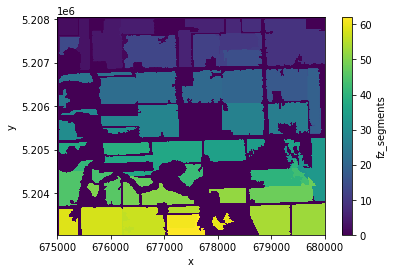

In [23]:
%%time

### Plot field segments
ds_time_stack.fz_segments.plot()

In [24]:
%%time

## write to shapefile
config['shp_file_out_str'] = file_out_str

write_shapefile(ds_time_stack.fz_segments.values, ds_time_stack, ds_time_stack.mask)


/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


-------Writing to Shapefile-------


/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/qray/anaconda3/envs/geoenv/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Output saved to: shp_dir/TPT_code_demo_threshold_x7500_y7500_step500.shp
CPU times: user 32.8 s, sys: 18.3 s, total: 51.2 s
Wall time: 30.3 s
